In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['X', 'Y', 'class']

# Read the CSV file and assign custom column names
df = pd.read_csv('/content/ushape.csv', names=column_names, header=None)

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


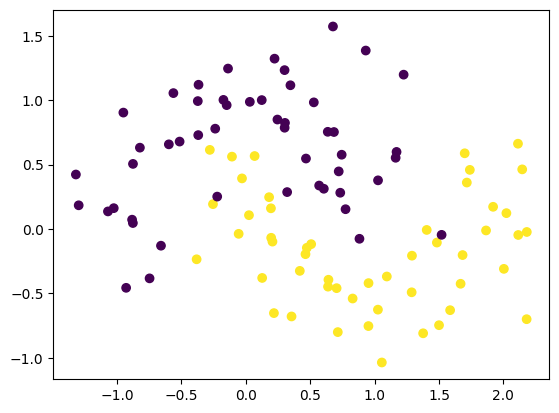

In [4]:
plt.scatter(x = df['X'],y = df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 1.7196494 ,  2.180631  ,  0.3617912 , -0.78963554,  0.13705245,
         -0.32882193,  0.1712801 , -1.5972992 , -0.48000312, -0.08893959],
        [ 1.7578409 ,  0.10789755, -0.93761134, -1.5538396 ,  1.1418225 ,
          0.8795198 , -0.6808905 ,  0.30143914, -0.9572886 , -0.96229064]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.30646807,  0.7711875 ,  0.05239399,  0.22592317, -0.47783738,
         -0.6169864 , -0.16119292,  0.86520696,  0.10144538,  0.36120722],
        [-0.45143154,  0.06804167,  0.5666566 ,  0.16002786, -0.6851954 ,
         -0.58097845,  0.60118896, -0.21112831, -0.03261661, -0.39902115],
        [-0.32288423,  0.9556497 ,  0.5037103 , -0.74740475, -0.2637894 ,
          0.15440252,  0.41105804, -0.317937  ,  0.34781802, -0.1112869 ],
        [-0.4095361 , -0.2751198 ,  0.1403958 ,  0.11811274,  0.4040749 ,
         -0.38712335,  0.25114837,  0.3356237 , -0.11632399, -0.37426043],
        [-0.30221

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[ 0.5685435 ,  0.20059465, -0.2632618 , -0.33300105, -0.39927092,
          0.8676492 , -0.5500772 ,  0.0115805 , -0.68531543,  0.6655237 ],
        [-0.68949133,  0.9853426 ,  0.14412978,  0.46446797, -0.76558155,
          0.07597807,  1.2011307 , -1.3744531 , -0.2507517 , -0.00988684]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.21264914,  0.01590347, -0.19557467,  0.07164934,  0.72472143,
         -0.25780466,  0.04982375, -0.2693448 , -0.08644992,  0.06867564],
        [ 0.3516225 ,  0.08444353, -0.20075049,  0.11016975, -0.05872933,
          0.01073117,  0.13302596,  0.11622999,  0.36970443,  0.51606154],
        [-0.07278591,  0.4745985 ,  0.31131545,  0.31719014,  0.55539656,
          0.10517655,  0.48749146,  0.19497442,  0.35111284, -0.61198765],
        [-0.31792516, -0.690698  , -0.00616401, -0.19498682,  0.8479036 ,
         -0.18320923, -0.03482876, -0.4916401 , -0.10856884, -0.36101288],
        [-0.54548

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 5s 474ms/step - loss: 0.6948 - accuracy: 0.6000 - val_loss: 0.6896 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6910 - accuracy: 0.7375 - val_loss: 0.6864 - val_accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6873 - accuracy: 0.6875 - val_loss: 0.6832 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6839 - accuracy: 0.7625 - val_loss: 0.6800 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6805 - accuracy: 0.7750 - val_loss: 0.6767 - val_accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6770 - accuracy: 0.7750 - val_loss: 0.6731 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6733 - accuracy: 0.7750 - val_loss: 0.6696 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

In [15]:
model.get_weights()

[array([[ 0.6424843 ,  0.3681472 , -0.4395517 , -0.19255354, -0.5534127 ,
          0.9958251 , -0.41605932,  0.11030034, -0.8817723 ,  0.7233252 ],
        [-0.90314007,  1.1784163 ,  0.34861556,  0.4329505 , -0.6687288 ,
          0.11452828,  1.4398899 , -1.6185889 , -0.3544609 , -0.14954229]],
       dtype=float32),
 array([ 0.17405641,  0.07380581,  0.16532557, -0.03859779, -0.10017398,
        -0.01872694,  0.17993896,  0.14379808, -0.03399189,  0.14701244],
       dtype=float32),
 array([[ 0.3593974 ,  0.03097032, -0.06293447,  0.17920601,  0.9164889 ,
         -0.22326183,  0.04982375, -0.20273116, -0.19227228, -0.02336409],
        [ 0.34329227,  0.27398446,  0.00268405,  0.05901606, -0.03082063,
         -0.03437953,  0.13302596,  0.20650321,  0.5499109 ,  0.6320757 ],
        [ 0.04346548,  0.62740177,  0.5051259 ,  0.3210281 ,  0.57713753,
          0.08680452,  0.48749146,  0.19497442,  0.4863825 , -0.7884158 ],
        [-0.22557802, -0.48592776,  0.20327866, -0.21690743, 

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

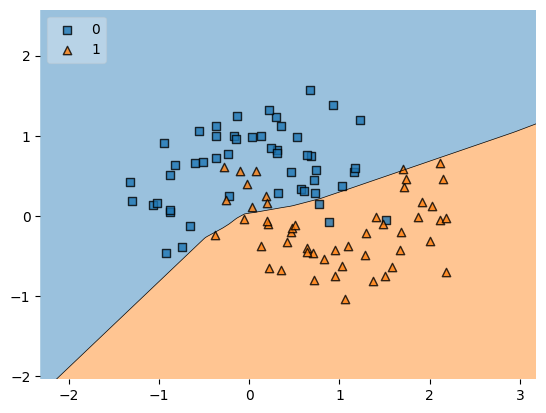

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)